# 12. Garden groups

How many fences do you need to fence the gardens?

Price of fence is $\text{area of plant} \cdot \text{number of fences}$

Also, to clarify, **price for each region is counted separately**!


(array([0, 4, 5, 7, 8], dtype=int64),)
(array([0, 2, 4, 6, 8], dtype=int64),)
(array([0, 1, 2, 4, 6, 8], dtype=int64),)
(array([0, 2, 4, 6, 8], dtype=int64),)
4

(array([], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
4

(array([], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
4
Part 1 1184
Part 2 144


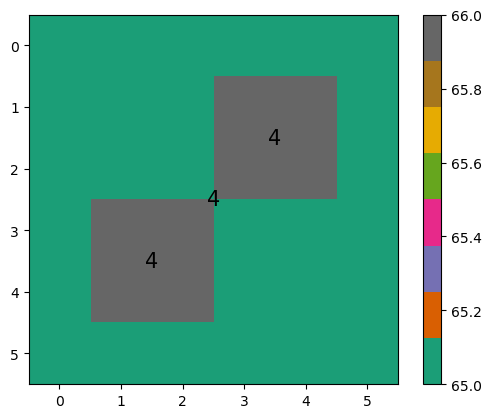

In [48]:
import numpy as np
import matplotlib.pyplot as plt


def direction(i):
    return np.array([np.round(np.sin(np.pi * i * 1/2)), np.round(np.cos(np.pi * i * 1/2))], dtype = int)

def FenceCounter(coordinate):
    fenceCount = 0
    for i in range(0, 4):
        xc, yc = coordinate
        xi, yi = np.array(coordinate) + direction(i)

        if 0 <= xi < len(data) and 0 <= yi < len(data[0]): # Check if cout of bounds
            if data[xc][yc] == data[xi][yi]:
                continue

        fenceCount += 1

    return fenceCount

def AreaFinder(x, y, visited = set(), edgesFound = set()):
    if (x, y) in visited:
        return visited, edgesFound
    visited.add((x, y))

    for i in range(0, 4):
        xi, yi = np.array([x, y]) + direction(i)

        if not (0 <= xi < len(data) and 0 <= yi < len(data[0])): # Check if out of bounds
            edgesFound.add((x, y, i)) # Store on which side a fence was found
            continue

        if data[x][y] == data[xi][yi]: # Check if next plant is same as current one           
            vis, edges = AreaFinder(xi, yi, visited, set())
            visited.update(vis)
            edgesFound.update(edges)
        else:
            edgesFound.add((x, y, i)) # Store on which side a fence was found

    return visited, edgesFound # Return set of all visited cells

data = [[cell for cell in line.strip("\n")] for line in open("test.txt").readlines()]

plt.figure()

AllVisitedCells = set()
FencePrice1 = 0
FencePrice2 = 0

for x in range(len(data)):
    for y in range(len(data[0])):
        if (x, y) not in AllVisitedCells:
            explored, edgesFound = AreaFinder(x, y, set(), set()) # its co'uicial to create new sets because otherwise they dont get cleared between calls!
            
            # for coordinate in explored:
            #     plt.text(coordinate[1], coordinate[0], str(len(edgesFound)), color="white", ha="center", va="center")
            

            ### PART 1 ###
            FencePrice1 += len(explored) * len(edgesFound)

            ### PART2 ###
            sideCount = 0
            print()

            for i in range(4):
                edgArr = np.array(list(edgesFound))
                edges = edgArr[np.where(edgArr[:, 2] == i)] # Obtain all edges with same orientation
                direct = direction(i)

                # Group together consecutive points in edges
                sorted_edges = edges[np.argsort(edges[:, 1])]  # Sort edges by the second column
                consecutive = np.diff(sorted_edges[:, abs(direction(i)[0])]) == 1  # Check if consecutive points

                sideCount += len(np.where(consecutive == True))

                # print(direct)
                print(np.where(consecutive == True))
                # print()
            print(sideCount)
            FencePrice2 += len(explored) * sideCount

            # Plot
            center_x = sum(coord[0] for coord in explored) / len(explored)
            center_y = sum(coord[1] for coord in explored) / len(explored)
            plt.text(center_y, center_x, sideCount, color='Black', fontsize=15, ha='center', va='center')
                        
            AllVisitedCells.update(explored) 

print("Part 1", FencePrice1)
print("Part 2", FencePrice2)

Data_int = [[ord(cell) for cell in row] for row in data] # Convert characters to ASCII codes (for visualization)

# plt.figure(figsize=(15, 15))
plt.imshow(Data_int, cmap='Dark2')
plt.colorbar()
plt.show()

In [ ]:
from scipy.signal import convolve2d





ImportError: cannot import name 'convolve2D' from 'scipy' (c:\Users\cenet\anaconda3\Lib\site-packages\scipy\__init__.py)